<a href="https://colab.research.google.com/github/zivlir/FirstRepository/blob/master/MainModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import spacy
import torch
import torchvision
import torch.nn as nn


Add Kaggle dataset to Colab using .json and bash commands.


In [0]:
from google.colab import files
uploaded = files.upload()
#after 3 hours it works with Google only

Saving kaggle.json to kaggle.json


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Add to practical part - how to transfer kaggle dataset and use it


####    We can use bash commands in collab using exclamation mark
---



In [0]:
!pip install -q kaggle

In [0]:
!mkdir another

In [0]:
!mkdir kdatsls

In [0]:
pwd

'/content'

In [0]:
ls

another/  kaggle.json  kdatsls/  sample_data/


In [0]:
cp kaggle.json kdatsls/

In [0]:
ls


another/  kaggle.json  kdatsls/  sample_data/


Kaggle expects the files to be in the ~/ .kaggle directory.It is necessary to follow this convention.

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [0]:
!chmod 600 ~/.kaggle/kaggle.json


In [0]:
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          18386  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02          12882  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          14271  
chirin/africa-economic-banking-and-systemic-crisis-data  Africa Economic, Banking and Systemic Crisis Data   14KB  2019-07-21 02:00:17           6602  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data     

In [0]:
!kaggle datasets download -d marklvl/sentiment-labelled-sentences-data-set

  0% 0.00/326k [00:00<?, ?B/s]
100% 326k/326k [00:00<00:00, 44.6MB/s]


In [0]:
ls


another/     kdatsls/      sentiment-labelled-sentences-data-set.zip
kaggle.json  sample_data/


In [0]:
!unzip sentiment-labelled-sentences-data-set.zip

Archive:  sentiment-labelled-sentences-data-set.zip
  inflating: sentiment labelled sentences/amazon_cells_labelled.csv  
  inflating: sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/imdb_labelled.csv  
  inflating: sentiment labelled sentences/imdb_labelled.txt  
  inflating: sentiment labelled sentences/readme.txt  
  inflating: sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.csv  
  inflating: sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.csv  
  inflating: sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt  
  inflating: sentiment labelled sentences/sentiment labelled sentences/readme.txt  
  inflating: sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.csv  
  inflating: sentiment labelled sentences/sentiment labelled sentences/yel

In [0]:
pwd


'/content/sentiment labelled sentences'

In [0]:
# import pandas as pd
# import glob
# wdata = {
#     "yelp": "..sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt/",
#     "imdb": "..sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt/",
#     "amazon": "..sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt/"
#     }

# ENCO_I =  "ISO-8859-1"
# #csv1_path = "../sentiment labelled sentences/yelp_labelled.csv"
# ds_arr=[]

# for source, filepath in wdata.items():
#     df = pd.read_csv(wdata, encoding=ENCO_I, names=['sentence', 'label'], sep='\t')
#     df['source'] = source  # Add another column filled with the source name
#     ds_arr.append(df)
# #
# #dataset1 = pd.read_csv(csv1_path, encoding=ENCO_I, names=COLS_DATASET)

#***********************************

# df = pd.concat(ds_arr)
# df.iloc[0]

# df.tail()

# dataset1.info()

# dataset1.head()

/





/







/


# With glob we can list files with needed format


In [0]:
!sudo pip3 install glob3

  Created wheel for glob3: filename=glob3-0.0.1-cp36-none-any.whl size=1680 sha256=2df50ed1a462330513b24579aa319ee4038449599d7321fd83e341e0778c95e6
  Stored in directory: /root/.cache/pip/wheels/5c/db/36/aae4683ac0ba95eb154510b48d6bda87fbaac71b6a9b62123d
Successfully built glob3


In [0]:
import glob 
import pandas as pd

# get data file names

path =r'../content/sentiment labelled sentences/sentiment labelled sentences/'

csv_docs = glob.glob("*.csv")
print(csv_docs)

print('\n')

txt_docs = glob.glob("*.txt")
print(txt_docs)

['amazon_cells_labelled.csv', 'combined_csv.csv', 'imdb_labelled.csv', 'yelp_labelled.csv']


['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt', 'readme.txt']


In [0]:
wdata = {"imdb_dataset":   "../sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt",
         "yelp_dataset":   "../sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt",
         "amazon_dataset": "../sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt"}

ds_arr = []

for origin, doc_name in wdata.items():
    wdataset = pd.read_csv(filepath, names=['text', 'score'], sep='\t')
    wdataset['origin'] = origin
    ds_arr.append(wdataset)

#ndataset is data frame - each .txt file in our data repository, ds_arr  - list of 3 datasets

###Each dataset consist of 1000 sentences with sentiment scire either Negative or Positive. The array of sentences in each set start from 0 and end 999, so that mean 3000 unique phrases together

In [0]:
wdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
text      1000 non-null object
score     1000 non-null int64
origin    1000 non-null object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


### Here we can see that sentence of the 2100-th position has Name: 100 and origin - amazon_dataset, so that illustrates how 3 datasets are places after each other. Amazon is placed last, the 3rd one.

In [0]:
wdataset.iloc[2100]


text      Integrated seamlessly with the Motorola RAZR p...
score                                                     1
origin                                       amazon_dataset
Name: 100, dtype: object

In [0]:
from __future__ import print_function

wdataset = pd.concat(ds_arr)

print(wdataset.iloc[5])
print('\n') 
print(wdataset.iloc[500])
print('\n') 
print(wdataset.iloc[999])
print('\n') 
print(wdataset.iloc[1000])
print('\n') 
print(wdataset.iloc[1100])
print('\n') 
print(wdataset.iloc[1850])
print('\n') 
print(wdataset.iloc[1893])
print('\n') 
print(wdataset.iloc[2001])
print('\n') 
print(wdataset.iloc[2999])
print('\n') 


text      I have to jiggle the plug to get it to line up...
score                                                     0
origin                                         imdb_dataset
Name: 5, dtype: object


text      The bose noise cancelling is amazing, which is...
score                                                     1
origin                                         imdb_dataset
Name: 500, dtype: object


text      You can not answer calls with the unit, never ...
score                                                     0
origin                                         imdb_dataset
Name: 999, dtype: object


text      So there is no way for me to plug it in here i...
score                                                     0
origin                                         yelp_dataset
Name: 0, dtype: object


text      Integrated seamlessly with the Motorola RAZR p...
score                                                     1
origin                                         yelp_data

In [0]:
# ndataset.loc[source ='yelp_dataset']

In [0]:
ndataset.head()

,text,score,source
0,"A very, very, very slow-moving, aimless movie ...",0,imdb_dataset
1,Not sure who was more lost - the flat characte...,0,imdb_dataset
2,Attempting artiness with black & white and cle...,0,imdb_dataset
3,Very little music or anything to speak of.,0,imdb_dataset
4,The best scene in the movie was when Gerardo i...,1,imdb_dataset


Find negative and positive  expressions from the dataframe we use.

In [0]:
only_negative_scores = ["0"]
wdataset.loc[wdataset['score'].isin(negative_scores)]

,text,score,origin
0,So there is no way for me to plug it in here i...,0,imdb_dataset
3,Tied to charger for conversations lasting more...,0,imdb_dataset
5,I have to jiggle the plug to get it to line up...,0,imdb_dataset
6,If you have several dozen or several hundred c...,0,imdb_dataset
8,"Needless to say, I wasted my money.",0,imdb_dataset
...,...,...,...
995,The screen does get smudged easily because it ...,0,amazon_dataset
996,What a piece of junk.. I lose more calls on th...,0,amazon_dataset
997,Item Does Not Match Picture.,0,amazon_dataset
998,The only thing that disappoint me is the infra...,0,amazon_dataset


In [0]:
only_positive_scores = ["1"]
wdataset.loc[wdataset['score'].isin(only_positive_scores)]

,text,score,origin
1,"Good case, Excellent value.",1,imdb_dataset
2,Great for the jawbone.,1,imdb_dataset
4,The mic is great.,1,imdb_dataset
7,If you are Razr owner...you must have this!,1,imdb_dataset
10,And the sound quality is great.,1,imdb_dataset
...,...,...,...
971,Excellent product.,1,amazon_dataset
975,It is the best charger I have seen on the mark...,1,amazon_dataset
976,SWEETEST PHONE!!!,1,amazon_dataset
977,":-)Oh, the charger seems to work fine.",1,amazon_dataset




```
# This is formatted as code
```

###MATPLOTLIB GRAPH as example

In [0]:
# from collections import Counter #nuzhno
import matplotlib.pyplot as plt #pocti moj kod
from collections import Counter
%matplotlib inline

In [0]:
decode_map = {0: "negative_sentiment", 1: "positive_sentiment"}
def decode_sentiment(sc):
    return decode_map[int(sc)]

In [0]:
%%time
wdataset.score = wdataset.score.apply(lambda x: decode_sentiment(x))


CPU times: user 2.41 ms, sys: 54 µs, total: 2.47 ms
Wall time: 2.76 ms


Text(0.5, 1.0, 'Score distribuition of all datasets together')

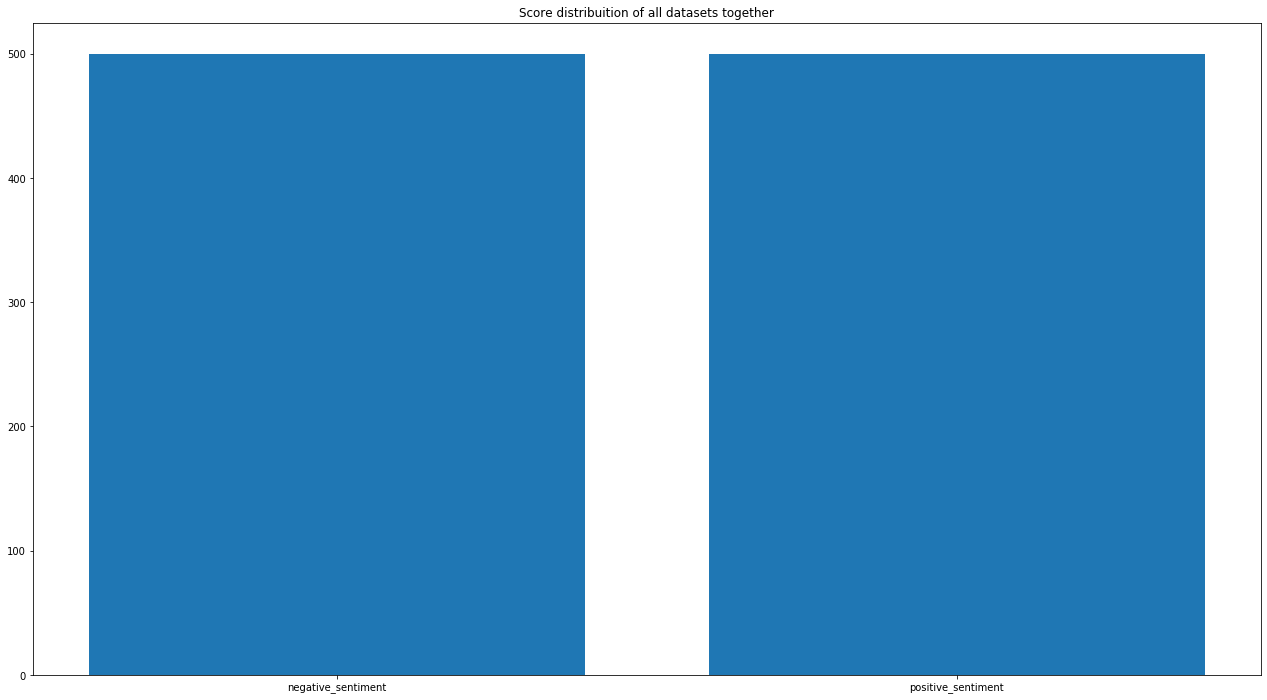

In [0]:
score_cnt = Counter(wdataset.score)

plt.figure(figsize=(22,12))
plt.bar(score_cnt.keys(), score_cnt.values())
plt.title("Score distribuition of all datasets together")


#We can switch between documents in our data repository

In [0]:
yelp_ds = ndataset[ndataset['origin'] == 'yelp_dataset']

In [0]:
yelp_ds.head()

,text,score,origin
0,So there is no way for me to plug it in here i...,0,yelp_dataset
1,"Good case, Excellent value.",1,yelp_dataset
2,Great for the jawbone.,1,yelp_dataset
3,Tied to charger for conversations lasting more...,0,yelp_dataset
4,The mic is great.,1,yelp_dataset


#RNN MODEL for machine learning

In [0]:
import torch.nn as nn
import torch